# Predicción 

Haremos una predicción de la variable `Mas_1_Coche` en un nuevo set de datos empleando un modelo ya entrenado de XGBoost.

El primer paso es importar las librerías necesarias.

In [1]:
# Cargamos las librerías necesarias.
import pandas as pd
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ahora cargamos nuestros datos.

In [2]:
# Cargamos nuestros datos.
X = pd.read_csv('../data/car_data_input_clean.csv', sep=',')

# Mostramos la forma y los primeros registros de nuestro DataFrame.
print(X.shape)
X.head()

(23230, 21)


,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente
0,0,0,0,1,1,0,0,1,1,4,...,0,0,2,0,2,1,3,0,2,0
1,0,0,0,1,1,0,0,0,1,47,...,0,0,2,1,3,0,0,0,2,2
2,0,0,0,1,1,3,0,1,1,30,...,0,0,1,0,3,0,0,0,4,0
3,0,0,0,1,1,2,0,0,2,41,...,0,1,0,0,3,0,2,0,3,0
4,0,0,0,1,1,2,0,0,1,4,...,0,0,1,1,1,0,2,2,2,2


Cargamos el modelo con el que haremos la predicción y la variable `mapping` que contiene las equivalencias a las variables categóricas que modificamos a numéricas en la limpieza de datos.

In [3]:
# Importamos el modelo XGBoost y la variable de mapeo.

# Cargar el modelo.
modelo = joblib.load('../modelos/modelo_XGB.pkl')

# Cargar la variable.
with open('mappings.pkl', 'rb') as archivo:
    mappings = pickle.load(archivo)

Estandarizamos las columnas.

In [4]:
# Creamos un objeto StandardScaler.
scaler = StandardScaler()

# Obtenemos las columnas del DataFrame.
cols = X.columns

# Ajustamos y escalamos las columnas del DataFrame.
X[cols] = scaler.fit_transform(X[cols])

Hacemos predicciones y obtenemos probabilidades usando nuestro modelo de XGBoost.

In [5]:
# Hacer predicciones en el conjunto de prueba.
predictions = modelo.predict(X)

# También puedes obtener las probabilidades de las clases.
probabilities = modelo.predict_proba(X)

Agregamos estos resultados al DataFrame. De esta manera, podremos ver qué perfiles de clientes podrían comprar más de un coche según nuestra predicción.

In [6]:
# Agregar las predicciones y probabilidades al DataFrame.
X['Mas_1_Coche'] = predictions
X['Probabilidad_0'] = probabilities[:, 0]
X['Probabilidad_1'] = probabilities[:, 1]

# Mostrar el DataFrame con las predicciones y probabilidades.
X.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
0,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,-0.914090,-0.530788,0.646277,-0.120750,-1.413129,...,-0.896734,-0.208340,1.290906,0.783958,-1.038295,-0.598089,-1.317786,0,0.913393,0.086607
1,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,-0.914090,-0.530788,-1.547325,-0.120750,1.394650,...,1.115158,0.777551,-0.774650,-1.371316,-1.038295,-0.598089,0.738171,0,0.965275,0.034725
2,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,1.534139,-0.530788,0.646277,-0.120750,0.284598,...,-0.896734,0.777551,-0.774650,-1.371316,-1.038295,0.198289,-1.317786,0,0.981233,0.018767
3,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,0.718063,-0.530788,-1.547325,3.438933,1.002867,...,-0.896734,0.777551,-0.774650,0.065533,-1.038295,-0.199900,-1.317786,1,0.274681,0.725319
4,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,0.718063,-0.530788,-1.547325,-0.120750,-1.413129,...,1.115158,-1.194232,-0.774650,0.065533,0.509768,-0.598089,0.738171,0,0.890533,0.109467


Deshacemos la estandarización de datos que hicimos antes de meterlos en nuestro modelo.

In [7]:
# Deshacer el escalado.
X_original = X.copy()  # Copiar el DataFrame original.
X_original[cols] = scaler.inverse_transform(X[cols])  # Deshacer el escalado.

# Mostrar el DataFrame tras deshacer el escalado.
X_original.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
0,0.0,4.440892e-16,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,...,0.0,2.0,1.0,3.0,0.0,2.0,0.0,0,0.913393,0.086607
1,0.0,4.440892e-16,0.0,1.0,1.0,0.0,0.0,0.0,1.0,47.0,...,1.0,3.0,0.0,0.0,0.0,2.0,2.0,0,0.965275,0.034725
2,0.0,4.440892e-16,0.0,1.0,1.0,3.0,0.0,1.0,1.0,30.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0,0.981233,0.018767
3,0.0,4.440892e-16,0.0,1.0,1.0,2.0,0.0,0.0,2.0,41.0,...,0.0,3.0,0.0,2.0,0.0,3.0,0.0,1,0.274681,0.725319
4,0.0,4.440892e-16,0.0,1.0,1.0,2.0,0.0,0.0,1.0,4.0,...,1.0,1.0,0.0,2.0,2.0,2.0,2.0,0,0.890533,0.109467


Redondeamos a valores enteros.

In [8]:
X_original[cols] = X_original[cols].round().astype(int)

# Mostrar el DataFrame tras redondear las columnas.
X_original.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
0,0,0,0,1,1,0,0,1,1,4,...,0,2,1,3,0,2,0,0,0.913393,0.086607
1,0,0,0,1,1,0,0,0,1,47,...,1,3,0,0,0,2,2,0,0.965275,0.034725
2,0,0,0,1,1,3,0,1,1,30,...,0,3,0,0,0,4,0,0,0.981233,0.018767
3,0,0,0,1,1,2,0,0,2,41,...,0,3,0,2,0,3,0,1,0.274681,0.725319
4,0,0,0,1,1,2,0,0,1,4,...,1,1,0,2,2,2,2,0,0.890533,0.109467


Una vez obtenemos los valores enteros, podemos aplicar el mapeo para tener nuestro DataFrame con variables categóricas.

In [9]:
# Invertir el diccionario de mapeo.
inverted_mappings = {col: {v: k for k, v in mapping.items()} for col, mapping in mappings.items()}

# Aplicar el mapeo invertido al DataFrame.
for column, mapping in inverted_mappings.items():
    X_original[column] = X_original[column].replace(mapping)

# Mostrar el DataFrame con las variables categóricas recuperadas.
X_original.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
0,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,NO DATA,Averia muy grave,SI,3k-5k,0-10k,2,18-40,0,0.913393,0.086607
1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,SI,No,NO,0-2k,0-10k,2,50-60,0,0.965275,0.034725
2,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,NO DATA,No,NO,0-2k,0-10k,4,18-40,0,0.981233,0.018767
3,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,NO DATA,No,NO,2k-3k,0-10k,3,18-40,1,0.274681,0.725319
4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Asturias,...,SI,Averia leve,NO,2k-3k,10k-20k,2,50-60,0,0.890533,0.109467


Podemos filtrar aquellos clientes que nuestro modelo predice que sí que van a comprar más de un coche.

In [10]:
# Filtrar los clientes predichos.
clientes_predichos = X_original[X_original['Mas_1_Coche'] == 1]

# Mostrar los clientes predichos.
clientes_predichos

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
3,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,NO DATA,No,NO,2k-3k,0-10k,3,18-40,1,0.274681,0.725319
48,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,M,Empresa,Baleares,...,NO DATA,Averia muy grave,SI,0-2k,0-10k,1,18-40,1,0.368749,0.631251
62,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,M,Empresa,Baleares,...,NO DATA,Averia grave,NO,0-2k,0-10k,0,18-40,1,0.422111,0.577889
70,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Sevilla,...,NO DATA,Averia muy grave,SI,5k-10k,0-10k,2,18-40,1,0.222666,0.777334
79,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Guipuzcua,...,SI,No,NO,0-2k,0-10k,2,18-40,1,0.393713,0.606287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23205,I,TIPO7,FUEL 2,Alta,A,Financiera Marca,CASADO,M,Empresa,Barcelona,...,NO DATA,No,NO,2k-3k,0-10k,1,40-50,1,0.452266,0.547734
23209,I,TIPO7,FUEL 2,Alta,A,Financiera Marca,CASADO,M,Empresa,Valencia,...,NO DATA,No,NO,2k-3k,0-10k,1,40-50,1,0.141863,0.858137
23212,I,TIPO7,FUEL 1,Alta,A,Financiera Marca,CASADO,M,Empresa,Barcelona,...,NO DATA,No,NO,0-2k,0-10k,1,40-50,1,0.452266,0.547734
23213,I,TIPO7,FUEL 1,Alta,A,Financiera Marca,CASADO,M,Empresa,Madrid,...,SI,No,NO,2k-3k,10k-20k,1,50-60,1,0.373308,0.626692


In [11]:
def graficar_perfiles_clientes(df, prob):
    # Definir estilo de gráficos
    sns.set(style="whitegrid")

    # Crear figura y subplots (2x2)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Distribución del tipo de carrocería
    sns.countplot(data=df, x='TIPO_CARROCERIA', palette='Blues_r', ax=axes[0, 0])
    axes[0, 0].set_title(f'Distribución de Tipo de Carrocería (Probabilidad {prob})')
    axes[0, 0].set_xlabel('Tipo de Carrocería')
    axes[0, 0].set_ylabel('Cantidad de Clientes')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # 2. Distribución del tipo de combustible
    sns.countplot(data=df, x='COMBUSTIBLE', palette='Greens_r', ax=axes[0, 1])
    axes[0, 1].set_title(f'Distribución de Combustible (Probabilidad {prob})')
    axes[0, 1].set_xlabel('Tipo de Combustible')
    axes[0, 1].set_ylabel('Cantidad de Clientes')

    # 3. Distribución de la forma de pago
    sns.countplot(data=df, x='FORMA_PAGO', palette='Oranges_r', ax=axes[1, 0])
    axes[1, 0].set_title(f'Distribución de la Forma de Pago (Probabilidad {prob})')
    axes[1, 0].set_xlabel('Forma de Pago')
    axes[1, 0].set_ylabel('Cantidad de Clientes')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. Distribución de género y estado civil
    sns.countplot(data=df, x='GENERO', hue='ESTADO_CIVIL', palette='Set2', ax=axes[1, 1])
    axes[1, 1].set_title(f'Distribución de Género y Estado Civil (Probabilidad {prob})')
    axes[1, 1].set_xlabel('Género')
    axes[1, 1].set_ylabel('Cantidad de Clientes')

    # Ajustar diseño
    plt.tight_layout()

    # Mostrar gráficas
    plt.show()

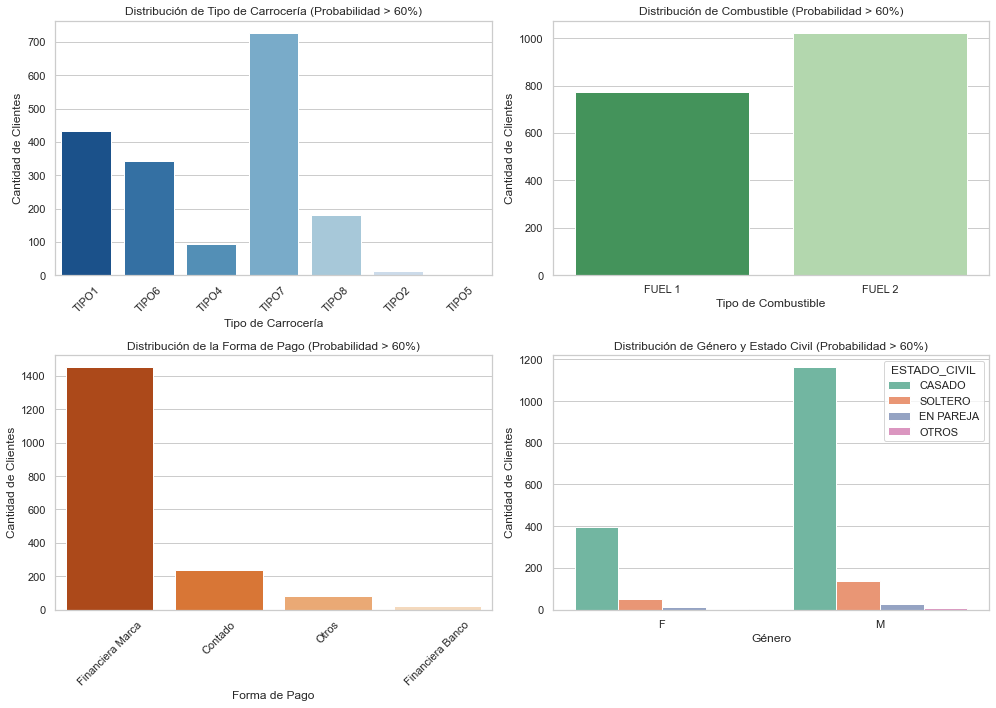

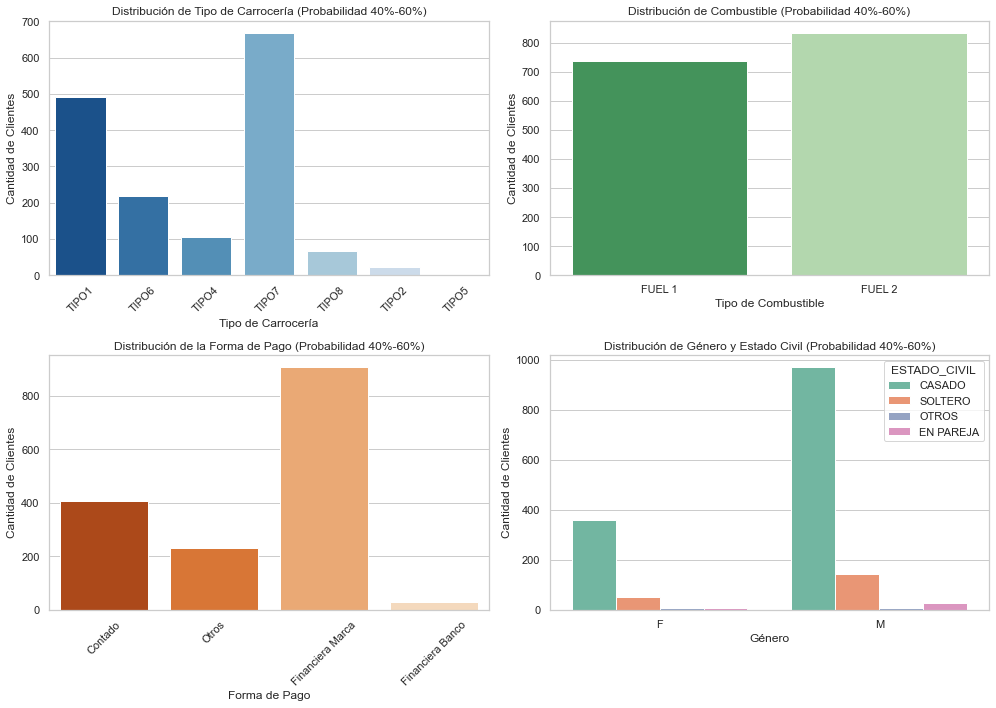

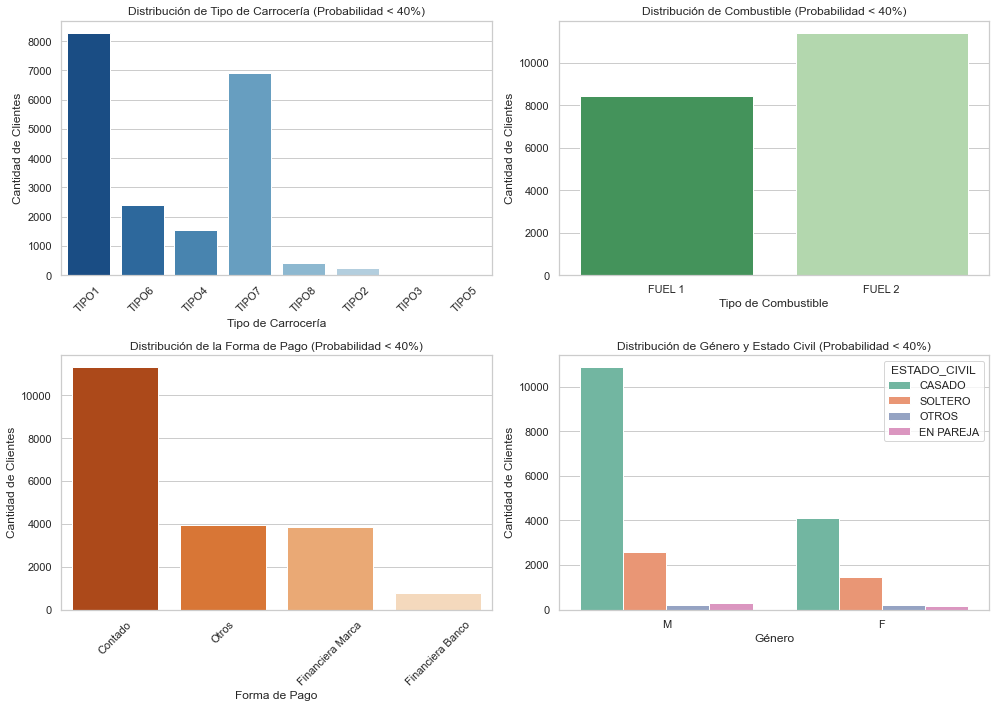

In [12]:
# Filtrar clientes.
clientes_alta_prob = X_original[X_original['Probabilidad_1'] > 0.6]
clientes_media_prob = X_original[(X_original['Probabilidad_1'] >= 0.4) & (X_original['Probabilidad_1'] <= 0.6)]
clientes_baja_prob = X_original[X_original['Probabilidad_1'] < 0.4]

# Graficamos los perfiles de los clientes.
graficar_perfiles_clientes(clientes_alta_prob, '> 60%')
graficar_perfiles_clientes(clientes_media_prob, '40%-60%')
graficar_perfiles_clientes(clientes_baja_prob, '< 40%')

Por último, guardamos los nuevos datos que contienen la información predicha.

In [13]:
# Guardar los resultados.
X_original.to_csv('../data/predicciones.csv', index=False)
clientes_predichos.to_csv('../data/clientes_predichos.csv', index=False)